##### PAIR PROGRAMMING - REGRESIÓN LINEAL 4

In [1]:
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# libreria para cambio de tipo de dato de string a lista
import ast

#importamos la librería statsmodels para hacer el gráfico de cuantiles teóricos (Q-Q plot)
import statsmodels.api as sm

#importamos esta librería para calcular el sesgo (Skew)
from scipy.stats import skew

#importamos esta libreria para calcular la curtosis
from scipy.stats import kurtosistest

#importamos stats para test de shapiro
from scipy import stats

import researchpy as rp

from scipy.stats import levene

In [2]:
df = pd.read_csv("datos/pokePd.csv", index_col = 0)
df.head()

,Name,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Bulbasaur,"['Grass', 'Poison']",318,45,49,49,65,65,45
1,Ivysaur,"['Grass', 'Poison']",405,60,62,63,80,80,60
2,Venusaur,"['Grass', 'Poison']",525,80,82,83,100,100,80
3,Venusaur Mega Venusaur,"['Grass', 'Poison']",625,80,100,123,122,120,80
4,Charmander,['Fire'],309,39,52,43,60,50,65


- En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
- El objetivo de este pairprogramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

1. Normalidad (ya la deberíais haber evaluado)
2. Homogeneidad de varianzas
3. Independencia de las variables
   
*** Cada asunción la deberéis testar de forma visual y analítica.

Asunción de Homogeneidad/Homocedasticidad

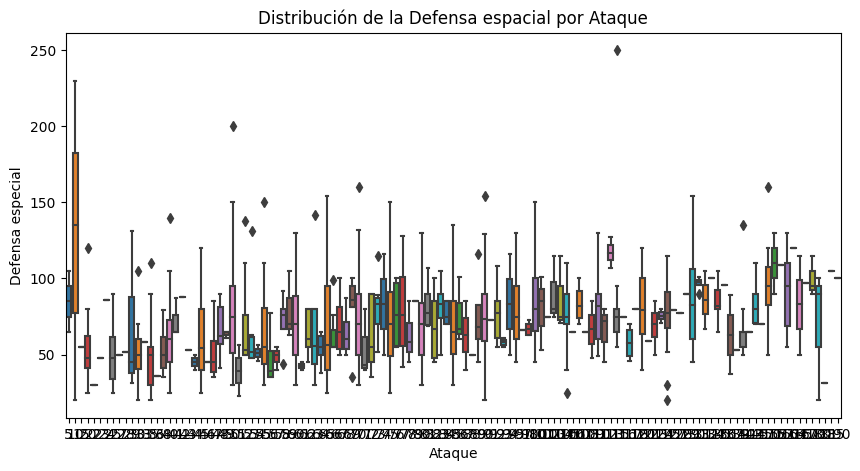

In [3]:
# nos hemos dado cuenta de que este y el violin solo es si tenemos una variable categórica

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.boxplot(
    x= 'Attack', 
    y= 'Sp.Def', 
    data = df, 
    palette = 'tab10',             
    ax= ax
)

ax.set_title('Distribución de la Defensa espacial por Ataque')
ax.set_ylabel('Defensa especial')
ax.set_xlabel('Ataque');


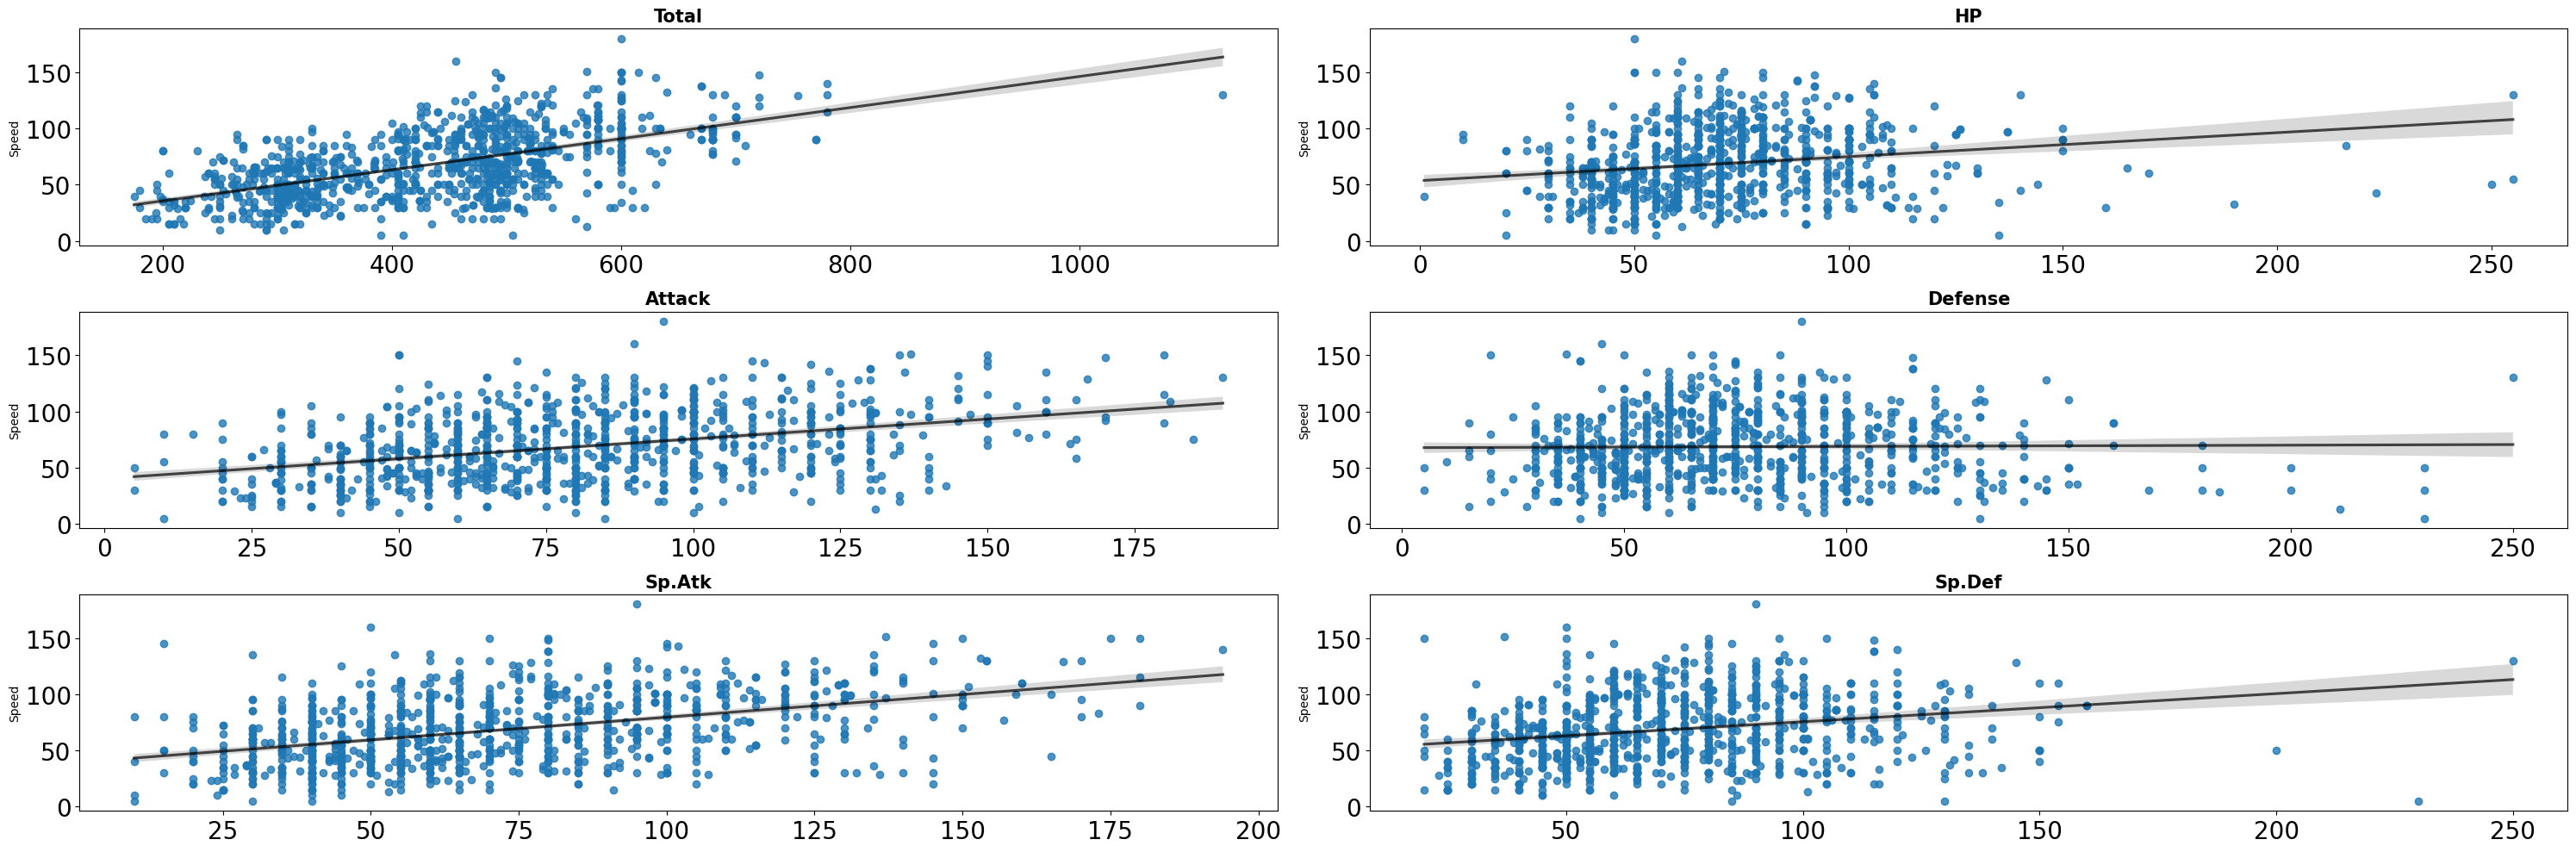

In [4]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
# lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('Speed', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'Speed',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

In [5]:
numericas = df.select_dtypes(include= np.number)
numericas.head()

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


In [6]:
resultados = {}

In [8]:
columnas_numeric

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def'], dtype='object')

In [9]:
columnas_numeric = df.select_dtypes(include= np.number).drop('Speed', axis = 1)

#iteremos por la lista de las columnas numéricas
for col in columnas_numeric.columns:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.Speed, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [10]:
# Obtenemos el diccionario de resultados, donde aparecen recogidos los datos de las homogeneidades de las variables predictoras
# Todos los valores son mayores que 0.05 menos el de Sp.Def, que no lo cumple ¿Qué hariamos en este caso? Según teoría transformación de la variable o usar otro algoritmo

resultados

{'Total': 1.1648509120224053e-185,
 'HP': 8.668609191894868e-12,
 'Attack': 0.07172301675809271,
 'Defense': 0.30132882749033146,
 'Sp.Atk': 0.09794500737938656,
 'Sp.Def': 0.0009087605554268787}

Asunción de Indepencia

In [11]:
# aplicamos en primer lugar el crosstab para evaluar si se cumple la asunción de independencia entre dos variables numéricas (Chi-square)

crosstab, test_results, expected = rp.crosstab(df["Attack"], df["Sp.Def"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [12]:
# en este test nos tenemos que fijar en el valor de Cramer's V, que es de 0,42. En este caso está más cerca de 0, 
#por lo que podríamos suponer que las variables son independientes entre sí

test_results

,Chi-square test,results
0,Pearson Chi-square ( 12932.0) =,20241.4983
1,p-value =,0.0000
2,Cramer's V =,0.4297
